In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [71]:
data = pd.read_csv('House_Price_dataset.csv')  
data.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,04-05-2019,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,01-04-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal


In [72]:
data.shape

(168446, 20)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [74]:
data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [75]:
data.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [76]:
df = data[['price', 'Area Size', 'bedrooms', 'baths']]

In [77]:
df

,price,Area Size,bedrooms,baths
0,10000000,4.0,2,2
1,6900000,5.6,3,3
2,16500000,8.0,5,6
3,43500000,2.0,4,4
4,7000000,8.0,3,3
...,...,...,...,...
168441,26500000,9.6,6,0
168442,12500000,8.0,3,0
168443,27000000,9.6,6,0
168444,11000000,7.8,3,0


In [78]:
data = data.dropna()

In [79]:
data

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal
10,1425602,429,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,06-03-2019,Al Sahar Estate,Zahid H. Usmani,Marla,7.1,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [80]:
X = data[['Area Size', 'bedrooms', 'baths']]
y = data['price']

In [81]:
X

,Area Size,bedrooms,baths
4,8.0,3,3
7,6.2,2,2
8,1.0,7,7
9,1.0,5,5
10,7.1,3,3
...,...,...,...
168441,9.6,6,0
168442,8.0,3,0
168443,9.6,6,0
168444,7.8,3,0


In [82]:
y

4          7000000
7          7800000
8         50000000
9         40000000
10        35000000
            ...   
168441    26500000
168442    12500000
168443    27000000
168444    11000000
168445     9000000
Name: price, Length: 124374, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train

,Area Size,bedrooms,baths
27432,7.8,3,3
156825,10.0,5,5
155448,3.0,0,0
152065,5.6,2,2
165939,14.2,0,0
...,...,...,...
163614,7.0,4,4
146364,5.0,2,0
1309,3.6,1,1
43375,1.0,5,6


In [85]:
X_test

,Area Size,bedrooms,baths
122992,17.1,5,5
104180,1.8,7,7
116817,10.0,3,3
98016,1.3,1,1
131536,8.0,3,3
...,...,...,...
123093,10.0,5,0
50201,12.0,4,5
79789,3.4,2,2
146082,4.0,4,4


In [86]:
y_train

27432     24000000
156825    21500000
155448       15000
152065       32000
165939       60000
            ...   
163614     7500000
146364     6000000
1309         50000
43375     41000000
165766     5000000
Name: price, Length: 99499, dtype: int64

In [87]:
y_test

122992     65000000
104180    210000000
116817     24500000
98016       3800000
131536     11200000
            ...    
123093     22000000
50201        180000
79789       6000000
146082        50000
133714        28000
Name: price, Length: 24875, dtype: int64

In [88]:
col=['price' ,'Area Size' ,'bedrooms', 'baths']

In [89]:
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

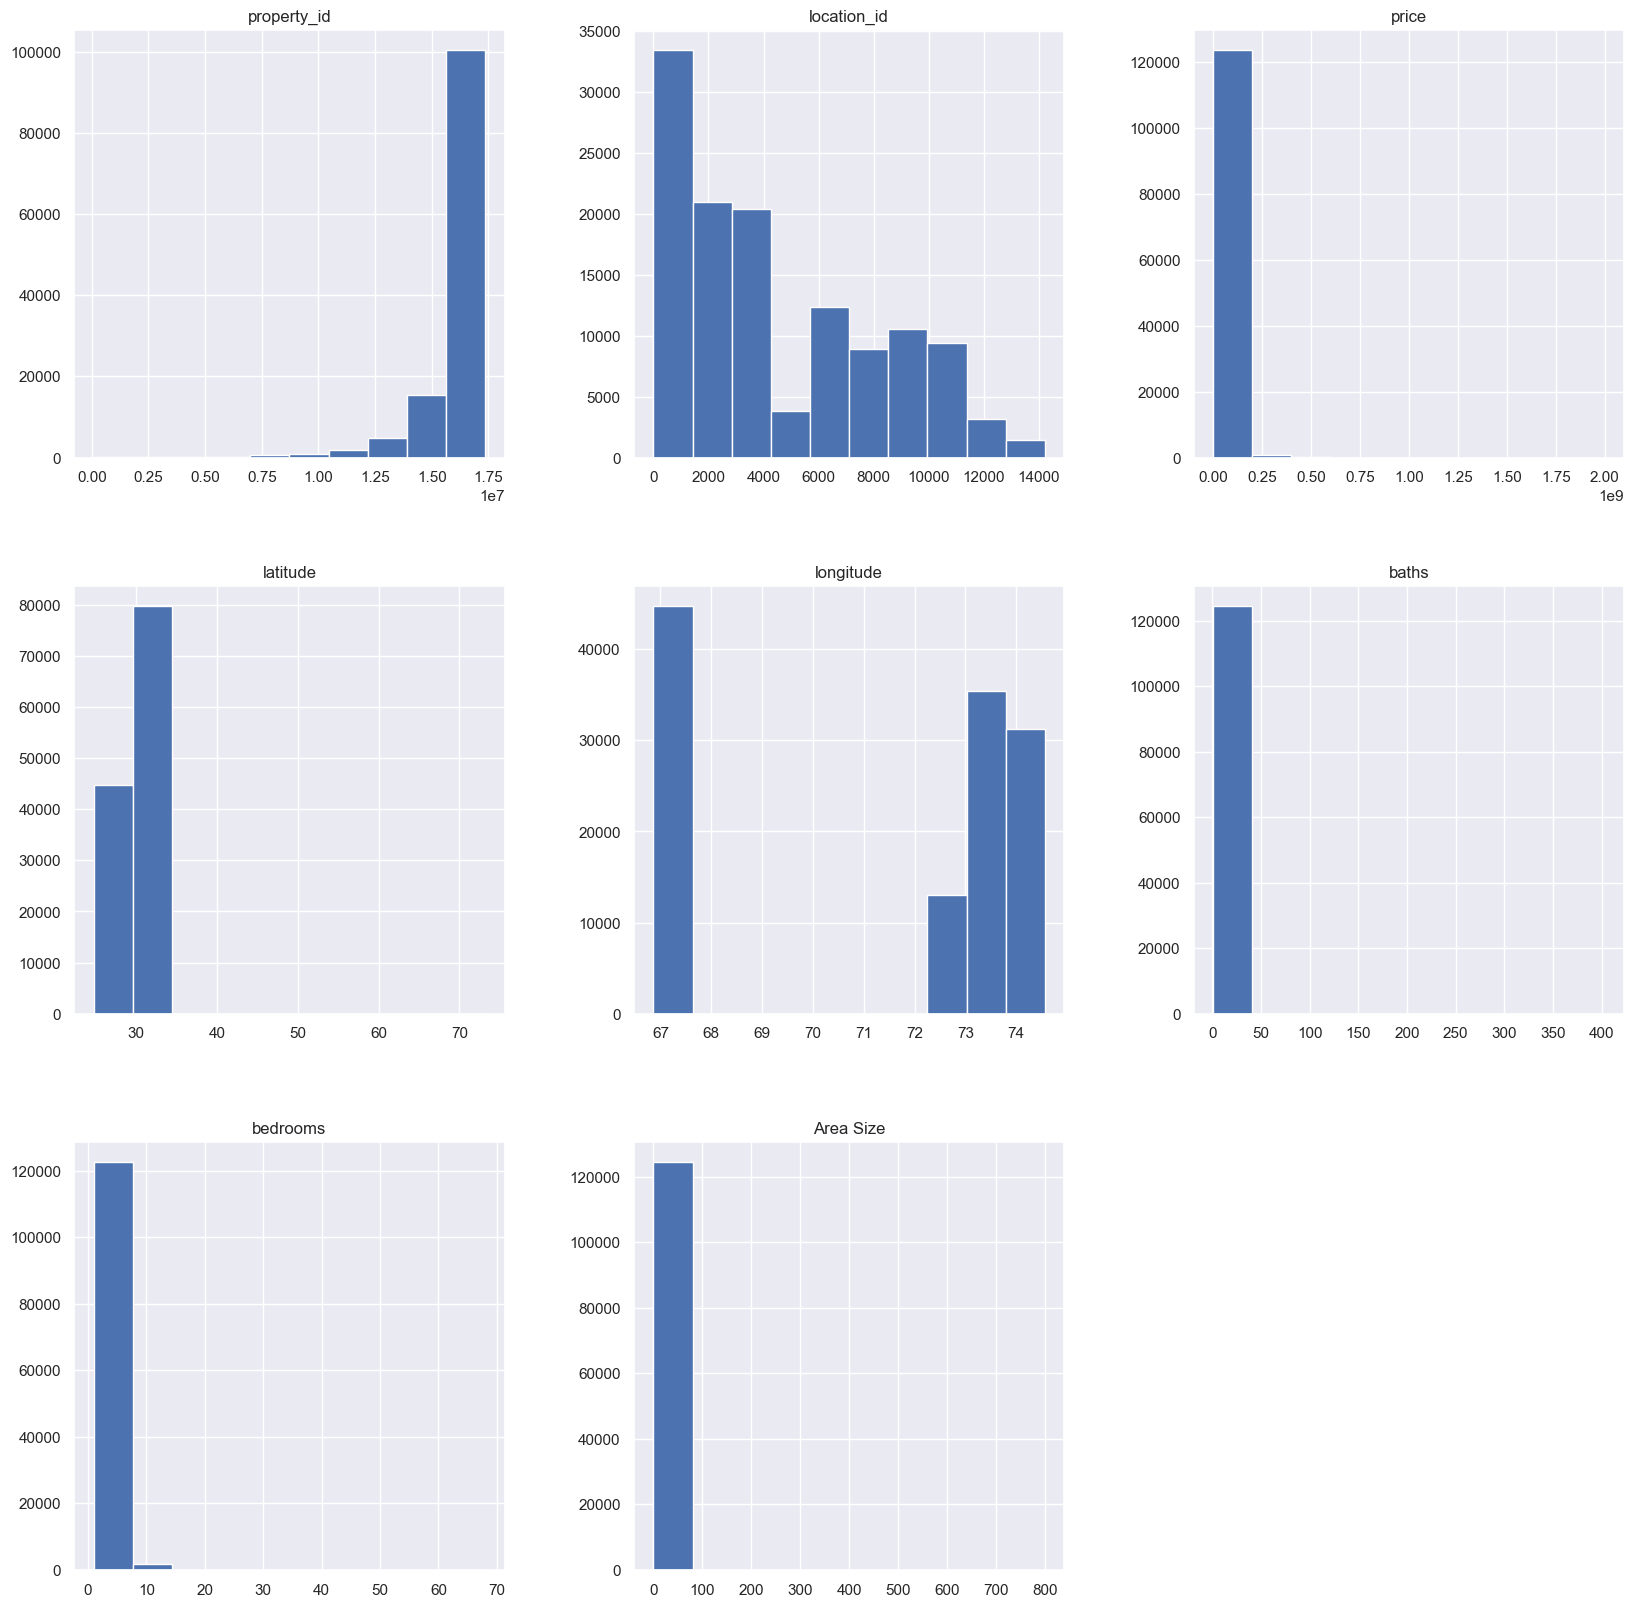

In [90]:
p=data.hist(figsize = (20,20))

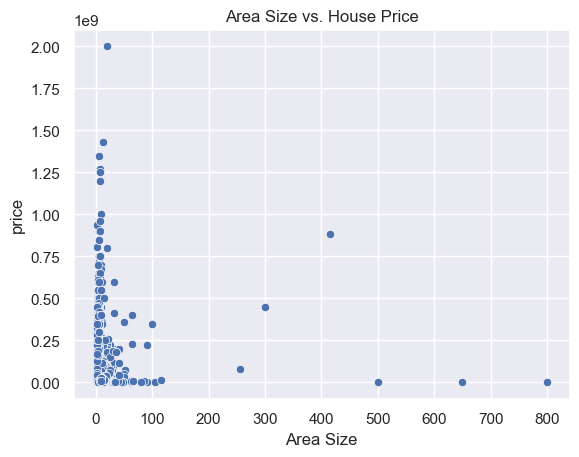

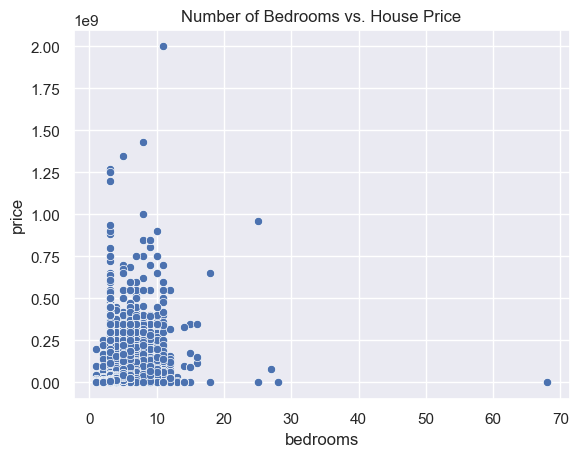

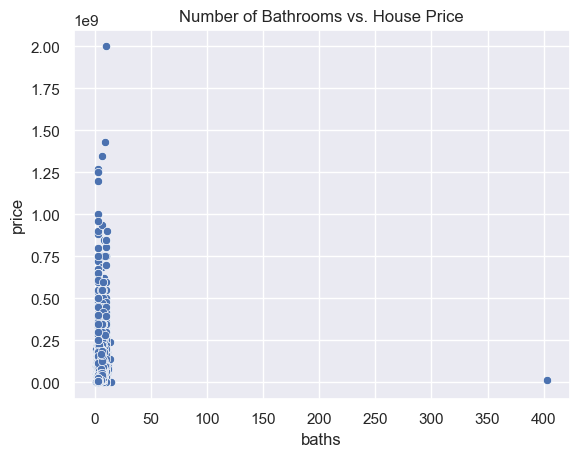

In [91]:
sns.scatterplot(x='Area Size', y='price', data=data)
plt.title('Area Size vs. House Price')
plt.show()

sns.scatterplot(x='bedrooms', y='price', data=data)
plt.title('Number of Bedrooms vs. House Price')
plt.show()

sns.scatterplot(x='baths', y='price', data=data)
plt.title('Number of Bathrooms vs. House Price')
plt.show()

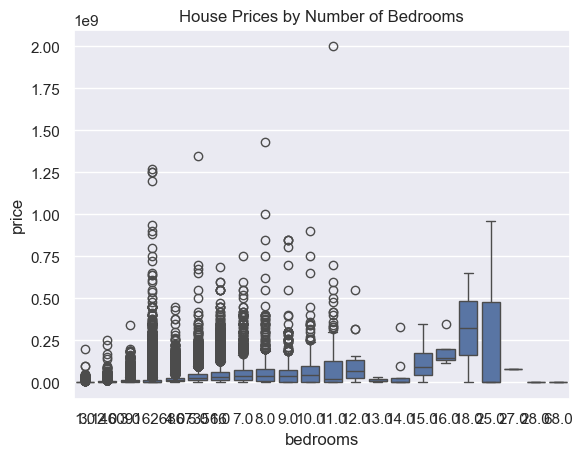

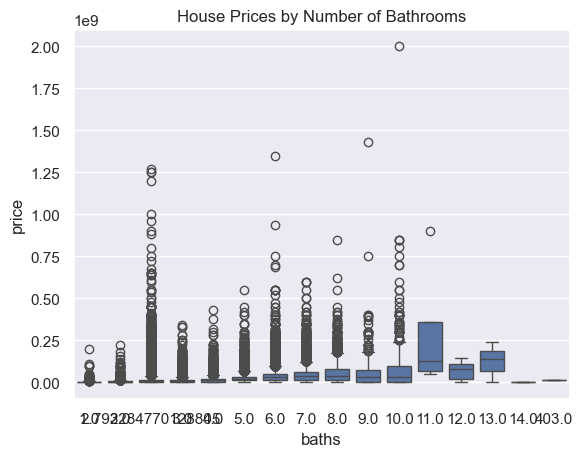

In [92]:
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('House Prices by Number of Bedrooms')
plt.show()

sns.boxplot(x='baths', y='price', data=data)
plt.title('House Prices by Number of Bathrooms')
plt.show()


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
median_price = data['price'].median()
data['price_category'] = (data['price'] > median_price).astype(int)

X = data[['Area Size', 'bedrooms', 'baths']]
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100}%")


Accuracy: 70.22311557788944%


In [129]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)



In [131]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Accuracy: {accuracy}%")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error (MSE): 0.20113123256152443
R-squared (R²): 0.19546695506470424
Accuracy: 0.7022311557788945%
Model Coefficients: [0.01054826 0.11769984 0.02661004]
Model Intercept: -0.08118602384960116



### Results
- **Mean Squared Error (MSE):** 0.2011
- **R-squared (R²):** 0.1955
- **Accuracy (as R² percentage):** 0.7022%
- **Model Coefficients:** 
  - Area Size: 0.0105
  - Bedrooms: 0.1177
  - Bathrooms: 0.0266
- **Model Intercept:** -0.0812

### Conclusion:

1. **R-squared (R²) Interpretation:**
   - **R² Value:** 0.1955 (or 19.55%).
   - **Interpretation:** This indicates that approximately 19.55% of the variance in house prices is explained by the model. This is relatively low, suggesting that the model does not account for a large proportion of the variability in house prices. Other factors not included in the model may significantly influence the price.

2. **Mean Squared Error (MSE):**
   - **MSE Value:** 0.2011
   - **Interpretation:** The MSE represents the average squared difference between the observed and predicted house prices. The lower the MSE, the better the model's performance. While the MSE is relatively low, it’s important to consider this in the context of the data’s scale.

3. **Model Coefficients:**
   - **Area Size:** A coefficient of 0.0105 suggests that for every unit increase in area size, the house price increases by 0.0105 units, holding other factors constant.
   - **Bedrooms:** A coefficient of 0.1177 indicates that each additional bedroom is associated with a 0.1177 unit increase in house price, all else being equal.
   - **Bathrooms:** A coefficient of 0.0266 shows a similar but smaller positive effect on price for each additional bathroom.

4. **Model Intercept:**
   - **Value:** -0.0812
   - **Interpretation:** The intercept is the expected house price when all predictors (area size, bedrooms, bathrooms) are zero. The negative value suggests that the baseline price is adjusted downward by this amount when the predictors are minimal, but this is likely a non-realistic scenario in practice.

5. **Overall Accuracy:**
   - **Value:** 0.7022%
   - **Interpretation:** This extremely low percentage indicates that the model's predictions are not highly accurate, which aligns with the low R² value. The model is likely not capturing the underlying relationships in the data effectively.

### Recommendations:
- **Feature Engineering:** Consider adding more relevant features or interacting terms, such as the location, year built, or any other factors that could influence house prices.
- **Data Transformation:** Scaling the data or applying transformations (e.g., logarithmic) might help improve the model's performance.
- **Model Complexity:** Exploring more complex models, like polynomial regression, decision trees, or random forests, might capture more of the underlying variance in the data.

This analysis suggests that while the model provides some insight into the relationship between the features and house prices, it is not yet robust enough for highly accurate predictions. Further refinement and additional data may improve the model's effectiveness.